<a href="https://colab.research.google.com/github/bailejor/SAMSHA_Transfer_Learning/blob/main/General_sub_no_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, Activation, Flatten, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image_dataset_from_directory
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, fbeta_score, precision_recall_curve
from matplotlib import pyplot

In [ ]:
!unzip /content/drive/MyDrive/TrainImages_70.nosync.zip

In [ ]:
!unzip /content/drive/MyDrive/ValImages.nosync.zip

Found 435974 files belonging to 2 classes.
Using 305182 files for training.
Found 435974 files belonging to 2 classes.
Using 130792 files for validation.
Found 93424 files belonging to 2 classes.


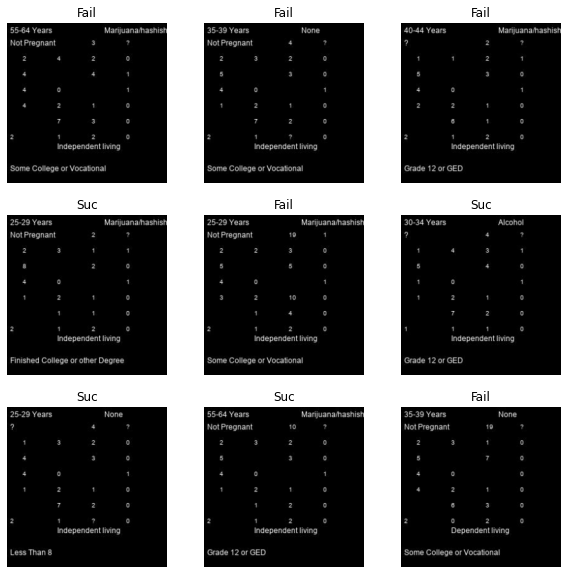

In [5]:


train_dataset = image_dataset_from_directory(
    '/content/TrainImages_70.nosync',
    validation_split=0.3,
    subset="training",
    seed=6,
    image_size=(250, 250),
    batch_size=32,
    shuffle = True,
    color_mode = 'rgb'
)

validation_dataset = image_dataset_from_directory(
    '/content/TrainImages_70.nosync',
    validation_split=0.3,
    subset="validation",
    seed=6,
    image_size=(250, 250),
    batch_size=32,
    shuffle = True,
    color_mode = 'rgb'
)


test_dataset = image_dataset_from_directory('/content/ValImages.nosync', image_size=(250, 250), color_mode='rgb', batch_size = 32,  shuffle=False)

class_names = train_dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+ 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [6]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
         ModelCheckpoint(filepath='/content/drive/MyDrive/best_model_noweight.h5', monitor='val_loss', save_best_only=True)]

model = Sequential()


model.add(Conv2D(32, (3, 3), input_shape=(250, 250, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()





model.compile(loss = keras.losses.BinaryCrossentropy(from_logits=True), optimizer = keras.optimizers.Adam(), 
              metrics=[keras.metrics.Precision(), keras.metrics.BinaryAccuracy(), keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalseNegatives(), keras.metrics.FalsePositives()])


history = model.fit(train_dataset, epochs = 15, verbose = 1, validation_data = validation_dataset, callbacks = callbacks)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 248, 248, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 122, 122, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 61, 61, 32)        0

0.7212707655420448
[[55353  2620]
 [23420 12031]]
0.8211726162036721
0.3393698344193394
0.48026026905113567
0.6395725905055553


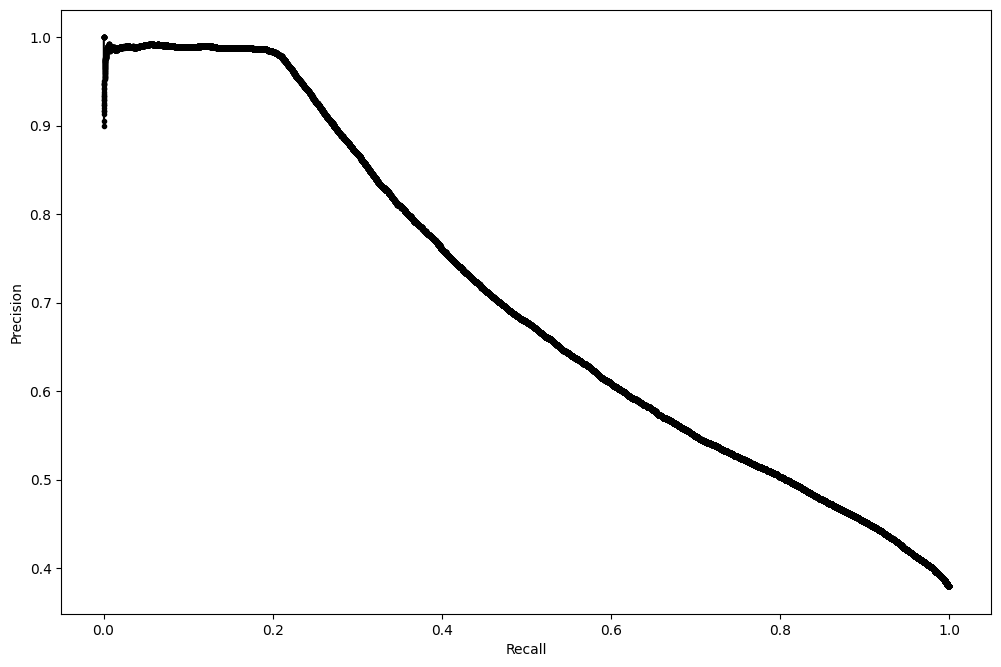

In [6]:
np.set_printoptions(threshold=np.inf)

model = Sequential()


model.add(Conv2D(32, (3, 3), input_shape=(250, 250, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))



model.load_weights('/content/drive/MyDrive/best_model_noweight.h5')
test_labels = []
test_classes = test_dataset.class_names
for images, labels in test_dataset:
  test_labels.append(labels)
test_labels = np.concatenate(test_labels, axis=0 )
test_labels = test_labels.flatten()

pred = model.predict(test_dataset)

pred = pred.flatten()


precision, recall, thresholds = precision_recall_curve(test_labels, pred)
pyplot.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
pyplot.plot(recall, precision, marker='.', label='Base CNN', color = 'k')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

#print(precision)
#print(recall)
#print(thresholds)
pred[pred<0.5]=0
pred[pred>=0.5]=1



print(accuracy_score(test_labels, pred))
print(confusion_matrix(test_labels, pred))
print(precision_score(test_labels, pred))
print(recall_score(test_labels, pred))
print(f1_score(test_labels, pred))
print(fbeta_score(test_labels, pred, beta = 0.5))
